In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# These steps are typically always called. The "matplotlib inline" is to display figures in this notebook itself


import pandas as pd
# pandas is a library for handling datasets; you will see some useful built-in functions in action

import os # to move around your operating system

import scipy as sp # scientific computation library

from mpl_toolkits.mplot3d import axes3d # in case we need to plot in 3D z=f(x,y)
import seaborn as sns # another package for pretty graphs

# Scikit-learn (sklearn) is a powerful and fairly comprehensive library of ML algorithms

from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity

(50,)


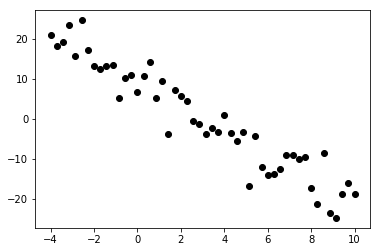

In [5]:
def f1(x, m, c): # y = m*x + c (ground truth function)
    return m*x + c 
xmin, xmax, npts = [-4, 10, 50]
X = np.linspace(xmin, xmax, npts) # defining domain of the function as a vector of 50 real numbers between 0 and 5
print(np.shape(X)) 
# Create data from ground truth function that is corrupted by additive Gaussian noise of mean 0 and std. dev. 4
y0 = f1(X, -3., 9.) + np.random.normal(0,scale=4, size=np.shape(X))  
plt.scatter(X, y0, marker='o', c='k')  #draw 散点图

training pair  (33,) (33,) testing pair  (17,) (17,)


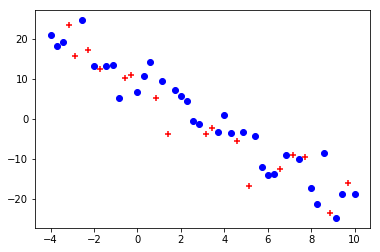

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y0, test_size=0.33, random_state=42)
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, marker='+', c='r')
print("training pair ",X_train.shape, y_train.shape, "testing pair ", X_test.shape,   y_test.shape)

In [7]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y0, test_size=0.33, random_state=42)

regr = linear_model.LinearRegression()
# Train the model using the training sets

X_train = np.atleast_2d(X_train).T
print("Checking that the shapes of arrays are compatible ", X_train.shape, y_train.shape) 

regr.fit(X_train, y_train) # this is the common interface for all data fitting procedures in scikit-learn
print("trained model has slope ", regr.coef_[0], " and intercept ", regr.intercept_)
yhat0 = (regr.intercept_ + np.atleast_2d(X_train*regr.coef_)).T
print("Explicit caculation ", yhat0)
y_fit0 = regr.predict(X_train)
print("Using scikit-learn ", y_fit0)

Checking that the shapes of arrays are compatible  (33, 1) (33,)
trained model has slope  -3.0929182221572633  and intercept  9.705558232485682
Explicit caculation  [[-18.57255123 -19.45624215   8.82186731  14.12401284   7.93817639
    0.86864903  -7.96826018  -5.31718742  22.07723112 -16.80516939
   -1.78242374  -7.08456926  17.65877652  -3.54980558  12.35663099
   -9.73564202  21.1935402    3.51972179  20.30984928 -15.92147847
   -8.8519511    1.75233995 -13.2704057   13.24032191   2.63603087
    6.17079455 -21.22362399   4.40341271  15.89139468 -15.03778754
    9.70555823  -2.66611466 -11.50302386]]
Using scikit-learn  [-18.57255123 -19.45624215   8.82186731  14.12401284   7.93817639
   0.86864903  -7.96826018  -5.31718742  22.07723112 -16.80516939
  -1.78242374  -7.08456926  17.65877652  -3.54980558  12.35663099
  -9.73564202  21.1935402    3.51972179  20.30984928 -15.92147847
  -8.8519511    1.75233995 -13.2704057   13.24032191   2.63603087
   6.17079455 -21.22362399   4.40341271 

Checking that the shapes of arrays are compatible  (17, 1) (17,)


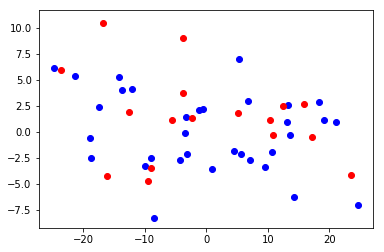

In [8]:
regr.fit(X_train, y_train)

X_test = np.atleast_2d(X_test).T
print("Checking that the shapes of arrays are compatible ", X_test.shape, y_test.shape) 


y_fit1 = regr.predict(X_test)
y_hat1 = (regr.intercept_ + np.atleast_2d(X_test*regr.coef_)).T



plt.scatter(y_train, (y_fit0 - y_train),c='b')
plt.scatter(y_test, (y_fit1 - y_test), c='r')
# Checking for obvious differenes in errors for training ans test sets